In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nglview as nv
import matplotlib.pyplot as plt
from Bio.PDB import PDBIO, Select, PDBParser
import ipywidgets as widgets
from matplotlib import colormaps as cmap
import matplotlib.colors as mcolors

In [2]:
LC_dataframe = pd.read_csv("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_L_correlations.csv")
HC_dataframe = pd.read_csv("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_H_correlations.csv")

positive_correlations_L = []
positive_correlations_H = []
negative_correlations_L = []
negative_correlations_H = []

# Looping through dataframes to extract positions with positive and negative correlations for LC and HC
for dataframe in [LC_dataframe, HC_dataframe]:
    if dataframe.equals(LC_dataframe):  # Checking if the current dataframe is LC_dataframe
        for index, row in dataframe.iterrows():
            if row["Pearson correlation"] >= 0:
                positive_correlations_L.append(row["Position"])

            elif row["Pearson correlation"] <= 0:
                negative_correlations_L.append(row["Position"])
                
    elif dataframe.equals(HC_dataframe):
        for index, row in dataframe.iterrows():
            if row["Pearson correlation"] >= 0:
                positive_correlations_H.append(row["Position"])

            elif row["Pearson correlation"] <= 0:
                negative_correlations_H.append(row["Position"])

In [3]:
"""
The following code defines a class and a function used for modifying B-factor values in a PDB structure based on 
correlation data from dataframes. It then proceeds to load the dataframes, parse the PDB structure, 
apply B-factor changes to specific chains, and save the modified structure.
"""

class ChainSelect(Select):
    #  This class is used to select specific chains (C and D) from a PDB structure for modification.
    def accept_chain(self, chain):
        return chain.get_id() in ["C", "D"]
        
def change_bfactor(chain, df):
    #  This function changes B-factor values in the atoms of residues in a given chain based on correlation data.
    for residue in chain:
        residue_id = residue.get_id()[1]
        # print(f"Residue ID: {residue_id}")
        # print(f"Index in DataFrame: {residue_id in df.index}")
        if residue_id in df.index:
            correlation = df.loc[residue_id, "Pearson correlation"]
            for atom in residue:
                atom.set_bfactor(correlation)
        else:
            # print("The b factor values have not been replaced")
            for atom in residue:
                atom.set_bfactor(-1)
            
# Load dataframes
LC_dataframe = pd.read_csv("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_L_correlations.csv")
LC_dataframe.set_index("Position", inplace=True)

HC_dataframe = pd.read_csv("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_H_correlations.csv")
HC_dataframe.set_index("Position", inplace=True)


parser = PDBParser()
structure = parser.get_structure("7MN8", f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7mn8.pdb")

# Change B-factor values for chain C and D
for model in structure:
    for chain in model:
        chain_id = chain.get_id().strip().upper()  # Convert to uppercase and strip whitespace
        if chain_id == "C":
            change_bfactor(chain, LC_dataframe)
        elif chain_id == "D":
            change_bfactor(chain, HC_dataframe)

# Save the modified structure
io = PDBIO()
io.set_structure(structure)
io.save(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_modified.pdb", ChainSelect())

positive_positions_H = ", ".join(map(str, positive_correlations_H))
positive_positions_L = ", ".join(map(str, positive_correlations_L))


# Display the modified structure with nglview
view = nv.show_structure_file(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_modified.pdb")
view.clear_representations()
view.add_representation('cartoon', selection=':C and 1-107', color="bfactor")
view.add_representation('cartoon', selection=':D and 1-120', color_scheme="bfactor")
view.add_representation('ball+stick', selection=':C and 16-26', color="bfactor")
view.add_representation('ball+stick', selection=':D and 16-26', color_scheme="bfactor")
# view.add_surface(selection=':C and 1-107', color_scheme="bfactor")
# view.add_surface(selection=':D and 1-120', color_scheme="bfactor")
# view.add_representation('ball+stick', selection=':C and 1-107', color="bfactor")
# view.add_representation('ball+stick', selection=f":C and ({positive_positions_L})", color_scheme="bfactor")
# view.add_label(selection=f":C and ({positive_positions_L})", labelType="resname", labelGrouping = "residue", color ="black")
# view.add_representation('ball+stick', selection=f":D and ({positive_positions_H})", color_scheme="bfactor")
# view.add_label(selection=f":D and ({positive_positions_H})", labelType="resname", labelGrouping = "residue", color ="black")

view.gui_style = "NGL"

view

/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15227.
  warnings.warn(
/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15269.
  warnings.warn(


ThemeManager()

NGLWidget(gui_style='ngl')

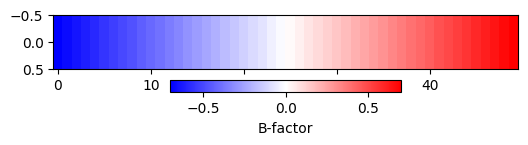

In [4]:
"""
The following code generates a color bar legend for B-factor values in the range of -0.7 to 0.7, using the 'bwr' colormap. 
This legend was used for the figures displayed in PyMOL (from the paper) to represent the B-factor values.
"""

# Define colormap and B-factor range
cmap = plt.get_cmap("bwr")
bfactor_range = np.linspace(-0.7,0.7)

# Create and save a horisontal color bar legend
fig, ax = plt.subplots(figsize=(6, 1))
cax = ax.imshow([bfactor_range], aspect='auto', cmap="bwr")
fig.colorbar(cax, orientation='horizontal', label='B-factor')
plt.savefig(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/pymol_colour_legend_bwr", bbox_inches="tight")

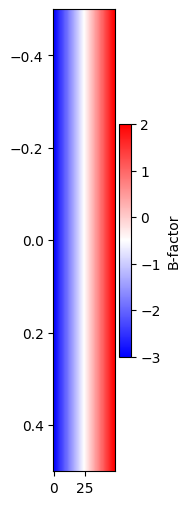

In [5]:
"""
The same as above but it is vertical
"""
bfactor_range = np.linspace(-3, 2)

fig, ax = plt.subplots(figsize=(1, 6))  # Adjusted figsize for vertical color bar
cax = ax.imshow([bfactor_range], aspect='auto', cmap="bwr")
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', label='B-factor')
# plt.savefig("Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/pymol_trastuzumab_colour_legend_bwr.png", bbox_inches="tight")
plt.show()

## Pattern seen in typtophan
take the b factor values and replace them with the scores for the tryptophan.

In [6]:
class ChainSelect(Select):
    def accept_chain(self, chain):
        return chain.get_id() in ["C", "D"]
        
def change_bfactor(chain, df):
    for residue in chain:
        residue_id = residue.get_id()[1]
        # print(f"Residue ID: {residue_id}")
        # print(f"Index in DataFrame: {residue_id in df.index}")
        if residue_id in df.index:
            score = df.loc[residue_id, "Rosetta normalised"]
            # if isinstance(score, pd.Series):
            #     print(df.loc["position"])
            for atom in residue:
                atom.set_bfactor(score)
        else:
            # print("The b factor values have not been replaced")
            for atom in residue:
                atom.set_bfactor(0)
            
trastuzumab_dataframe = pd.read_csv("Clean files/7mn8_DC.csv")
trastuzumab_dataframe_tryptophan = trastuzumab_dataframe[trastuzumab_dataframe["MUT_AA"] == "W"]
LC_tryptophan = trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "L"]
LC_tryptophan.set_index("position", inplace=True)

HC_tryptophan =  trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "H"]
HC_tryptophan.set_index("position", inplace=True)

parser = PDBParser()
structure = parser.get_structure("7MN8", f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7mn8.pdb")

# Change B-factor values for chain C and D
for model in structure:
    for chain in model:
        chain_id = chain.get_id().strip().upper()  # Convert to uppercase and strip whitespace
        if chain_id == "C":
            change_bfactor(chain, LC_tryptophan)
        elif chain_id == "D":
            change_bfactor(chain, HC_tryptophan)

# Save the modified structure
io = PDBIO()
io.set_structure(structure)
io.save(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_tryptophan_rosetta.pdb", ChainSelect())

# Display the modified structure with nglview
view = nv.show_structure_file(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_tryptophan_rosetta.pdb")
view.clear_representations()
view.add_representation('cartoon', selection=':C and 1-107', color="bfactor")
view.add_representation('cartoon', selection=':D and 1-120', color_scheme="bfactor")
view.gui_style = "NGL"
view

/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15227.
  warnings.warn(
/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15269.
  warnings.warn(


NGLWidget(gui_style='ngl')

In [7]:
class ChainSelect(Select):
    def accept_chain(self, chain):
        return chain.get_id() in ["C", "D"]
        
def change_bfactor(chain, df):
    for residue in chain:
        residue_id = residue.get_id()[1]
        # print(f"Residue ID: {residue_id}")
        # print(f"Index in DataFrame: {residue_id in df.index}")
        if residue_id in df.index:
            score = df.loc[residue_id, "AntiBERTy normalised"]
            # if isinstance(score, pd.Series):
            #     print(df.loc["position"])
            for atom in residue:
                atom.set_bfactor(score)
        else:
            # print("The b factor values have not been replaced")
            for atom in residue:
                atom.set_bfactor(0)
            
trastuzumab_dataframe = pd.read_csv("Clean files/7mn8_DC.csv")
trastuzumab_dataframe_tryptophan = trastuzumab_dataframe[trastuzumab_dataframe["MUT_AA"] == "W"]
LC_tryptophan = trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "L"]
LC_tryptophan.set_index("position", inplace=True)

HC_tryptophan =  trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "H"]
HC_tryptophan.set_index("position", inplace=True)

parser = PDBParser()
structure = parser.get_structure("7MN8", f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7mn8.pdb")

# Change B-factor values for chain C and D
for model in structure:
    for chain in model:
        chain_id = chain.get_id().strip().upper()  # Convert to uppercase and strip whitespace
        if chain_id == "C":
            change_bfactor(chain, LC_tryptophan)
        elif chain_id == "D":
            change_bfactor(chain, HC_tryptophan)

# Save the modified structure
io = PDBIO()
io.set_structure(structure)
io.save(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_tryptophan_antiberty.pdb", ChainSelect())

# Display the modified structure with nglview
view = nv.show_structure_file(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_tryptophan_antiberty.pdb")
view.clear_representations()
view.add_representation('cartoon', selection=':C and 1-107', color="bfactor")
view.add_representation('cartoon', selection=':D and 1-120', color_scheme="bfactor")
view.gui_style = "NGL"
view

/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15227.
  warnings.warn(
/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15269.
  warnings.warn(


NGLWidget(gui_style='ngl')

## Pattern seen in alanine
take the b factor values and replace them with the scores for the tryptophan.

In [8]:
class ChainSelect(Select):
    def accept_chain(self, chain):
        return chain.get_id() in ["C", "D"]
        
def change_bfactor(chain, df):
    for residue in chain:
        residue_id = residue.get_id()[1]
        # print(f"Residue ID: {residue_id}")
        # print(f"Index in DataFrame: {residue_id in df.index}")
        if residue_id in df.index:
            score = df.loc[residue_id, "Rosetta normalised"]
            # if isinstance(score, pd.Series):
            #     print(df.loc["position"])
            for atom in residue:
                atom.set_bfactor(score)
        else:
            # print("The b factor values have not been replaced")
            for atom in residue:
                atom.set_bfactor(0)
            
trastuzumab_dataframe = pd.read_csv("Clean files/7mn8_DC.csv")
trastuzumab_dataframe_tryptophan = trastuzumab_dataframe[trastuzumab_dataframe["MUT_AA"] == "A"]
LC_tryptophan = trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "L"]
LC_tryptophan.set_index("position", inplace=True)

HC_tryptophan =  trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "H"]
HC_tryptophan.set_index("position", inplace=True)

parser = PDBParser()
structure = parser.get_structure("7MN8", f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7mn8.pdb")

# Change B-factor values for chain C and D
for model in structure:
    for chain in model:
        chain_id = chain.get_id().strip().upper()  # Convert to uppercase and strip whitespace
        if chain_id == "C":
            change_bfactor(chain, LC_tryptophan)
        elif chain_id == "D":
            change_bfactor(chain, HC_tryptophan)

# Save the modified structure
io = PDBIO()
io.set_structure(structure)
io.save(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_alanine_rosetta.pdb", ChainSelect())

# Display the modified structure with nglview
view = nv.show_structure_file(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_alanine_rosetta.pdb")
view.clear_representations()
view.add_representation('cartoon', selection=':C and 1-107', color="bfactor")
view.add_representation('cartoon', selection=':D and 1-120', color_scheme="bfactor")
view.gui_style = "NGL"
view

/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15227.
  warnings.warn(
/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15269.
  warnings.warn(


NGLWidget(gui_style='ngl')

In [9]:
class ChainSelect(Select):
    def accept_chain(self, chain):
        return chain.get_id() in ["C", "D"]
        
def change_bfactor(chain, df):
    for residue in chain:
        residue_id = residue.get_id()[1]
        # print(f"Residue ID: {residue_id}")
        # print(f"Index in DataFrame: {residue_id in df.index}")
        if residue_id in df.index:
            score = df.loc[residue_id, "AntiBERTy normalised"]
            # if isinstance(score, pd.Series):
            #     print(df.loc["position"])
            for atom in residue:
                atom.set_bfactor(score)
        else:
            # print("The b factor values have not been replaced")
            for atom in residue:
                atom.set_bfactor(0)
            
trastuzumab_dataframe = pd.read_csv("Clean files/7mn8_DC.csv")
trastuzumab_dataframe_tryptophan = trastuzumab_dataframe[trastuzumab_dataframe["MUT_AA"] == "A"]
LC_tryptophan = trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "L"]
LC_tryptophan.set_index("position", inplace=True)

HC_tryptophan =  trastuzumab_dataframe_tryptophan[trastuzumab_dataframe_tryptophan["chain"] == "H"]
HC_tryptophan.set_index("position", inplace=True)

parser = PDBParser()
structure = parser.get_structure("7MN8", f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7mn8.pdb")

# Change B-factor values for chain C and D
for model in structure:
    for chain in model:
        chain_id = chain.get_id().strip().upper()  # Convert to uppercase and strip whitespace
        if chain_id == "C":
            change_bfactor(chain, LC_tryptophan)
        elif chain_id == "D":
            change_bfactor(chain, HC_tryptophan)

# Save the modified structure
io = PDBIO()
io.set_structure(structure)
io.save(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_alanine_antiberty.pdb", ChainSelect())

# Display the modified structure with nglview
view = nv.show_structure_file(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/7MN8_alanine_antiberty.pdb")
view.clear_representations()
view.add_representation('cartoon', selection=':C and 1-107', color="bfactor")
view.add_representation('cartoon', selection=':D and 1-120', color_scheme="bfactor")
view.gui_style = "NGL"
view

/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15227.
  warnings.warn(
/home/diancu/.conda/envs/antiberty/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15269.
  warnings.warn(


NGLWidget(gui_style='ngl')